In [2]:
%matplotlib inline
import pandas as pd
import os

In [5]:
runnum = 29
endyear = 2045
h5_location = './../runs/run{}.h5'.format(runnum)

In [3]:
store = pd.HDFStore(h5_location)
parcels_lid = store['base/parcels'][['large_area_id']]
lids = parcels_lid.large_area_id.unique()
years = range(2016, endyear + 1)

In [4]:
def filterdf(df, use):
    if use=='res':
        return df.loc[(df.residential_units > 0)
                      & (df.non_residential_sqft == 0)]
    elif use=='nonres':
        return df.loc[(df.residential_units == 0)
                      & (df.non_residential_sqft > 0)]
    elif use=='mixed':
        return df.loc[(df.residential_units > 0)
                      & (df.non_residential_sqft > 0)]
    else:
        return df

In [5]:
results = pd.DataFrame(index=parcels_lid.large_area_id.unique())

for use in ['res', 'nonres', 'mixed', 'total']:
    for year in years:
        buildings_name = '{}/buildings'.format(year)
        buildings = store[buildings_name]
        buildings = filterdf(buildings, use)
        b = buildings[['year_built', 'parcel_id']]
        b = b.merge(parcels_lid, left_on='parcel_id', right_index=True)
        b = b.loc[b.year_built == year]
        built_by_lid = b.groupby('large_area_id').count().year_built
        results[year] = built_by_lid
    results.to_csv('run{}_{}.csv'.format(runnum, use))

In [6]:
total = pd.read_csv('run{}_total.csv'.format(runnum), index_col=0)

In [13]:
total.loc[:, [str(y) for y in range(2022, 2036)]]

,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035
5,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,1.0,NaN
3,NaN,NaN,NaN,223,246.0,175.0,307.0,201.0,454.0,336.0,296.0,58.0,23.0,26.0
125,19.0,3.0,149.0,888,514.0,480.0,495.0,422.0,639.0,333.0,333.0,433.0,513.0,477.0
99,NaN,NaN,104.0,756,263.0,273.0,101.0,17.0,24.0,12.0,9.0,3.0,3.0,8.0
161,763.0,356.0,306.0,430,284.0,327.0,265.0,363.0,237.0,70.0,51.0,26.0,42.0,68.0
115,NaN,11.0,6.0,27,21.0,30.0,32.0,27.0,17.0,11.0,2.0,3.0,4.0,1.0
147,29.0,3.0,18.0,42,137.0,50.0,5.0,2.0,6.0,5.0,NaN,NaN,NaN,4.0
93,82.0,205.0,191.0,269,150.0,174.0,152.0,242.0,337.0,166.0,188.0,146.0,74.0,234.0


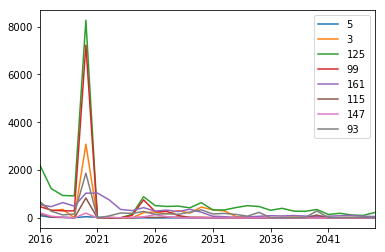

In [8]:
for l in lids:
    total.fillna(0).loc[l].plot(legend=True)

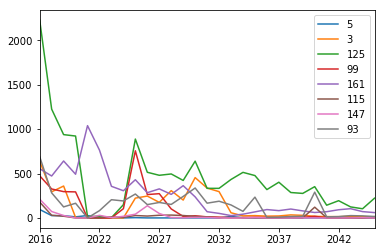

In [9]:
total_no_2020 = total[[c for c in total.columns if c not in ['2020']]]
for l in lids:
    total_no_2020.fillna(0).loc[l].plot(legend=True)
# total_no_2020

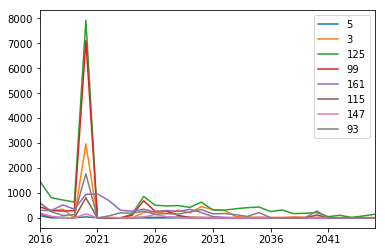

In [10]:
res = pd.read_csv('run{}_res.csv'.format(runnum), index_col=0)
for l in lids:
    res.fillna(0).loc[l].plot(legend=True)

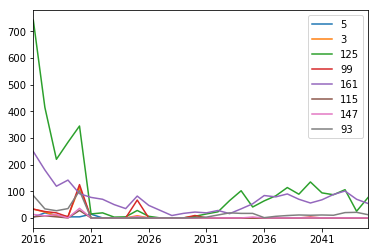

In [11]:
nonres = pd.read_csv('run{}_nonres.csv'.format(runnum), index_col=0)
for l in lids:
    nonres.fillna(0).loc[l].plot(legend=True)

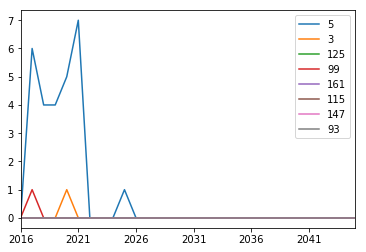

In [12]:
mixed = pd.read_csv('run{}_mixed.csv'.format(runnum), index_col=0)
for l in lids:
    mixed.fillna(0).loc[l].plot(legend=True)